In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image
from pathlib import Path
import random
import imutils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
gesture2label = {
    'Rock':0,
    'Paper':1,
    'Scissor':2,
    'None':3
}

label2gesture = {
    0:'Rock',
    1:'Paper',
    2:'Scissor',
    3:'None'
}

In [0]:
dirs = ['Rock','Paper','Scissor','None']
image_data = []
labels = []
cnt = 0
for folder_dirs in dirs:
    path = Path('Dataset/' + folder_dirs +'/')
    for img_path in path.glob('*.jpg'):
        img = image.load_img(img_path)
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(cnt)
    print(label2gesture[cnt], "Done")
    cnt+=1

Rock Done
Paper Done
Scissor Done
None Done


In [0]:
print(len(image_data),len(labels))

800 800


In [0]:
X = np.array(image_data)
Y = np.array(labels)

X,Y = shuffle(X,Y,random_state=2)
print(X.shape,Y.shape)

(800, 200, 300, 3) (800,)


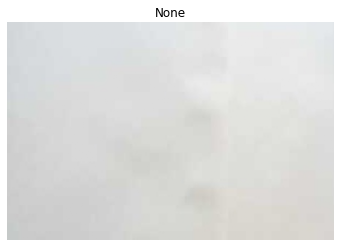

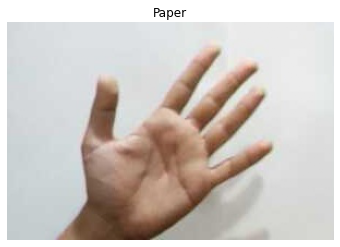

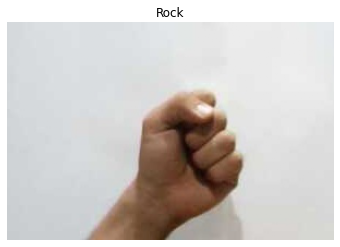

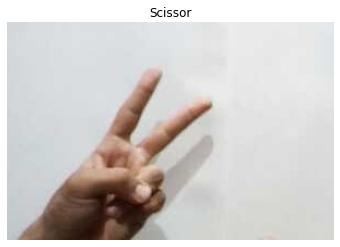

In [0]:
k = 4
for i in range(k):
    i = random.randint(0,X.shape[0])
    plt.imshow(X[i]/255.0)
    plt.title(label2gesture[Y[i]])
    plt.axis('off')
    plt.show()

In [0]:
X = X/255.0

In [0]:
from keras.utils import np_utils
Y = np_utils.to_categorical(Y)
print(Y[:10])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [0]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow

In [0]:
modelcheckpoint = ModelCheckpoint('mymodel.h5', save_best_only=True)
earlystopping = EarlyStopping(patience=3, restore_best_weights=True)

In [0]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(X.shape[1],X.shape[2],3))) # no of filters,shape of filters
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25)) # 25% of the neurons will be randomly dropped
model.add(MaxPooling2D(2,2)) # filter size, stride
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax')) # prob among 4 classes
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 298, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 196, 296, 64)      18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 196, 296, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 148, 64)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 94, 144, 32)       51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 90, 140, 8)        6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 100800)           

In [0]:
X.shape

(800, 200, 300, 3)

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
hist = model.fit(X,Y,epochs=10,batch_size=32,shuffle=True,validation_split=0.20, callbacks=[modelcheckpoint, earlystopping])

Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 273s 427ms/step - loss: 1.5084 - accuracy: 0.4047 - val_loss: 1.3086 - val_accuracy: 0.6500
Epoch 2/10
640/640 [==============================] - 267s 416ms/step - loss: 0.9105 - accuracy: 0.7750 - val_loss: 0.4887 - val_accuracy: 0.9875
Epoch 3/10
640/640 [==============================] - 270s 421ms/step - loss: 0.5088 - accuracy: 0.9500 - val_loss: 0.4984 - val_accuracy: 0.9750
Epoch 4/10
640/640 [==============================] - 267s 417ms/step - loss: 0.4030 - accuracy: 0.9672 - val_loss: 0.4171 - val_accuracy: 0.9937
Epoch 5/10
640/640 [==============================] - 270s 421ms/step - loss: 0.3703 - accuracy: 0.9844 - val_loss: 0.3795 - val_accuracy: 1.0000
Epoch 6/10
640/640 [==============================] - 267s 417ms/step - loss: 0.3332 - accuracy: 0.9937 - val_loss: 0.3604 - val_accuracy: 1.0000
Epoch 7/10
640/640 [==============================] - 270s 422ms/step - loss: 

KeyboardInterrupt: ignored

In [0]:
from keras.models import load_model

model_loaded = load_model('mymodel.h5')

In [0]:
pred = model_loaded.predict(X[0].reshape((1, *X[0].shape)))

Rock [[9.9998736e-01 1.2628943e-05 7.6088902e-10 2.7612564e-13]]


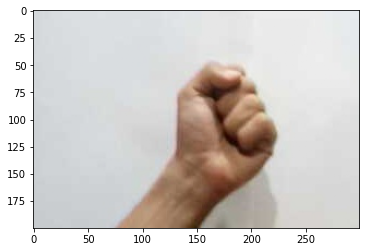

In [0]:
print(label2gesture[np.argmax(pred, axis=1)[0]], pred)
plt.imshow(X[0])
plt.show()

In [0]:
import cv2

In [0]:
img = X[0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
# img_thresh_Gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115,1)

In [0]:
# print(gray.shape)
# plt.imshow(gray/255.0)
# plt.show()

In [0]:
# ret, thres = cv2.threshold(img, 12, 0, cv2.THRESH_BINARY)

In [0]:
# thresnew = cv2.cvtColor(thres, cv2.COLOR)
# plt.imshow(thres)

In [0]:
import random

In [31]:

print(random.randint(1,3))
print(random.randint(1,3))
print(random.randint(1,3))
print(random.randint(1,3))
print(random.randint(1,3))
random.randint?

2
1
1
1
2
